In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## Loading Data

In [2]:
df = pd.read_csv('/Users/saurabh/Documents/PythonData/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.Time.unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

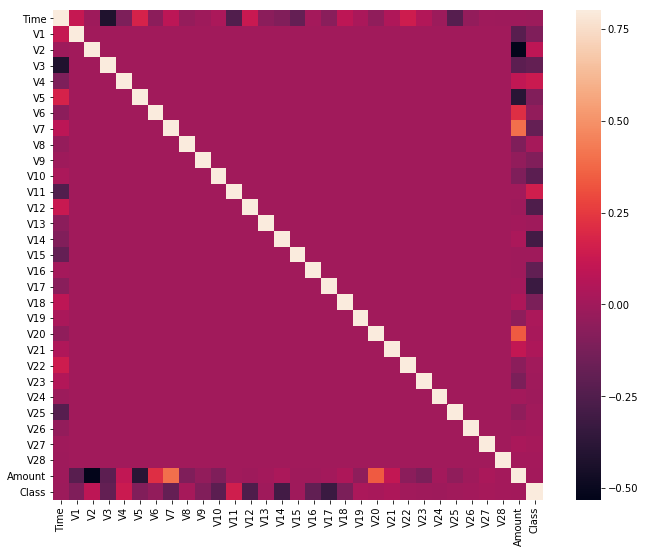

In [6]:
corrmat = df.corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

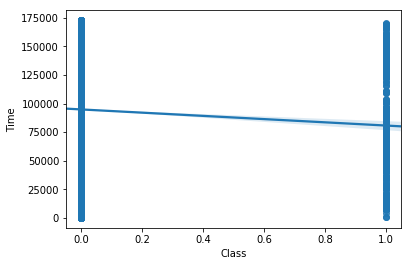

In [7]:
 ax = sns.regplot(x="Class", y="Time", data=df)

In [3]:
X = df.drop('Class', 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KNN

In [11]:
neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
y_pred = neighbors.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[85277,    30],
       [  108,    28]])

### Linear SVC

In [10]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[85283,    24],
       [  112,    24]])

### Random Forest

In [4]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
#cross_val_score(rfc, X_train, y_train, cv=5)

In [8]:
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[85298,     9],
       [   33,   103]])

In [5]:
df = pd.DataFrame()
df['imp']= rfc.fit(X, y).feature_importances_
df['features'] = X.columns

df.sort_values(by='imp', ascending=False)

,imp,features
12,0.150538,V12
17,0.133744,V17
10,0.100124,V10
9,0.088864,V9
16,0.073854,V16
14,0.064581,V14
18,0.060252,V18
11,0.032862,V11
4,0.025335,V4
26,0.024040,V26


### Gradient Boost

In [5]:
from sklearn import ensemble
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)

In [6]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[85291,    16],
       [  120,    16]])

### Logistic Regression

In [13]:
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[85271,    36],
       [   54,    82]])

The above analysis shows that Random Forest is the best model so far to apply for this kind of data to predict fraud

### XGBoost

In [5]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [6]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.96%


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
